   # Time Series Analysis on YOUC Cryptocurrency 

AMMAR KHODJA Lilia 
Group 4

### Abstract

 This project presents a comprehensive time series analysis of the YOUC cryptocurrency, aimed at understanding its price movements and forecasting future trends. The research employs historical price data, exploring inherent patterns to anticipate market behavior. Initial steps include the Augmented Dickey-Fuller and KPSS tests, crucial for determining the stationarity of the time series and ensuring robust model specification. The core of the study revolves around the selection and application of an optimal ARIMA model, meticulously chosen through exhaustive diagnostics such as residual checks and predictive accuracy measures. Despite the inherent volatility and unpredictability associated with cryptocurrencies, the results of this project underscore the ARIMA model's utility in providing informed market forecasts. The project's insights into YOUC's market trends not only advance our knowledge of its specific price dynamics but also enrich the broader discourse on financial time series forecasting, demonstrating the nuanced yet potent capabilities of econometric modeling in the volatile realm of cryptocurrency markets.

### Introduction

In the rapidly expanding universe of digital currencies, YouCash (YOUC) stands out for its innovative approach to integrating blockchain technology with real-world applications. As a part of this project, we delve into an in-depth analysis of YouCash's USD exchange rate data, a dataset graciously made available through https://www.kaggle.com/datasets/tr1gg3rtrash/time-series-top-100-crypto-currency-dataset. This platform is celebrated for its diverse and extensive datasets, serving as a treasure trove for data analysts and researchers alike.

The burgeoning interest in cryptocurrencies like YouCash is not unfounded. These digital assets herald a new era of financial transactions, promising enhanced security, reduced transaction costs, and an unprecedented level of transparency through decentralized ledger technology. Yet, the very nature of these assets introduces a level of market volatility that is both a risk and an attraction for investors and speculators. This volatility is not merely a feature of the market; it embodies the complex interplay of technological innovations, market sentiment, regulatory landscapes, and global economic factors.

The investigation of YouCash's time series data is not an academic exercise in isolation. It is a window into understanding the dynamic forces that shape the cryptocurrency markets. Why is this important? For starters, the insights derived from analyzing YouCash can inform investment strategies, risk management approaches, and even regulatory considerations. Furthermore, by untangling the patterns and characteristics of YouCash's price movements, we contribute to a broader comprehension of digital currencies' market behaviors.

This project, therefore, is poised at the intersection of technology and finance, aiming to shed light on YouCash's past and present market dynamics. The goal is to not only grasp what drives fluctuations in YouCash's value but also to explore the potential of time series analysis as a tool for forecasting future trends. In doing so, we embark on a journey that is as much about understanding a single cryptocurrency as it is about appreciating the broader implications of blockchain technology in the financial world.

As we proceed, it's crucial to remember that the cryptocurrency market is emblematic of a larger shift towards digital financial ecosystems. Analyzing YouCash's USD exchange rate data is a step towards demystifying this complex and often misunderstood arena, offering insights that may well extend beyond the confines of a single digital currency.

## Model specification

### Data Understanding and Preparation

Before diving into complex models, it's imperative to thoroughly understand the dataset at hand. The YouCash (YOUC) USD exchange rate dataset, sourced from Kaggle, comprises daily closing prices, among other financial indicators. However, for the purpose of time series analysis and forecasting, our primary focus will be on the closing price, which serves as a comprehensive reflection of market sentiment and activity for each day.

#### Data Loading and Initial Inspection

Performing an initial inspection to understand its structure, identify missing values, and assess the need for data cleaning.

In [136]:
library(tidyverse)

# Loading the dataset
youc_data <- read.csv("YOUC-USD.csv")

# Initial inspection of the dataset
summary(youc_data)
head(youc_data,10)


  timestamp            adjclose            open              low         
 Length:723         Min.   :0.00081   Min.   :0.00081   Min.   :0.00001  
 Class :character   1st Qu.:0.04994   1st Qu.:0.05020   1st Qu.:0.04074  
 Mode  :character   Median :0.12657   Median :0.12619   Median :0.10251  
                    Mean   :0.18420   Mean   :0.18369   Mean   :0.17401  
                    3rd Qu.:0.24630   3rd Qu.:0.24559   3rd Qu.:0.22039  
                    Max.   :0.51154   Max.   :0.51154   Max.   :0.51151  
     volume             high              close        
 Min.   :      0   Min.   :0.001245   Min.   :0.00081  
 1st Qu.:  33010   1st Qu.:0.055997   1st Qu.:0.04994  
 Median : 100342   Median :0.143436   Median :0.12657  
 Mean   : 285066   Mean   :0.191380   Mean   :0.18420  
 3rd Qu.: 368318   3rd Qu.:0.255151   3rd Qu.:0.24630  
 Max.   :1470038   Max.   :0.511615   Max.   :0.51154  

,timestamp,adjclose,open,low,volume,high,close
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,2020-10-06 00:00:00,0.097295,0.097349,0.097252,0,0.097349,0.097295
2,2020-10-07 00:00:00,0.093035,0.097295,0.092763,0,0.098395,0.093035
3,2020-10-08 00:00:00,0.097847,0.093035,0.092478,0,0.097847,0.097847
4,2020-10-09 00:00:00,0.155221,0.098067,0.096844,11986,0.160551,0.155221
5,2020-10-10 00:00:00,0.165428,0.155185,0.155175,14300,0.171482,0.165428
6,2020-10-11 00:00:00,0.150468,0.165428,0.149724,0,0.168984,0.150468
7,2020-10-12 00:00:00,0.153614,0.150468,0.146112,6185,0.158473,0.153614
8,2020-10-13 00:00:00,0.141521,0.153614,0.125682,6447,0.155415,0.141521
9,2020-10-14 00:00:00,0.131360,0.141607,0.110084,12960,0.143436,0.131360


The dataset presents an extensive chronological record of YOUC cryptocurrency, encapsulating 723 observations that reflect the currency's trading metrics. It includes several key financial indicators: adjusted closing price, opening price, lowest price of the day (low), trading volume, highest price of the day (high), and the closing price.

### Data Cleaning

In [139]:
# Load necessary libraries
library(tidyverse)
library(lubridate)

# Read the dataset
data <- read.csv("YOUC-USD.csv")

# Convert the 'timestamp' column to Date format
data$timestamp <- as.Date(data$timestamp, format = "%Y-%m-%d %H:%M:%S")

# Ensure there are no missing values in 'close' column
# This is good for checking but might not be necessary for the final script.
sum(is.na(data$close))  # Checking for NA values

# Assuming a decision to remove rows with NAs if they exist
data <- na.omit(data)

# Ensure data is sorted by date to maintain time order
data <- data %>% arrange(timestamp)


# Inspect the cleaned data
glimpse(data)


[1] 0

Rows: 723
Columns: 7
$ timestamp <date> 2020-10-06, 2020-10-07, 2020-10-08, 2020-10-09, 2020-10-10,…
$ adjclose  <dbl> 0.097295, 0.093035, 0.097847, 0.155221, 0.165428, 0.150468, …
$ open      <dbl> 0.097349, 0.097295, 0.093035, 0.098067, 0.155185, 0.165428, …
$ low       <dbl> 0.097252, 0.092763, 0.092478, 0.096844, 0.155175, 0.149724, …
$ volume    <int> 0, 0, 0, 11986, 14300, 0, 6185, 6447, 12960, 17525, 18315, 1…
$ high      <dbl> 0.097349, 0.098395, 0.097847, 0.160551, 0.171482, 0.168984, …
$ close     <dbl> 0.097295, 0.093035, 0.097847, 0.155221, 0.165428, 0.150468, …


Structured Time Series Data: the dataset is well-structured for time series analysis, with 723 rows indicating daily observations of YouCash (YOUC) closing prices from October 6, 2020, onwards. The presence of a timestamp column in Date format is crucial for any time series analysis, allowing for accurate time indexing.

No Missing Values: The fact that there are 0 missing values in the close prices suggests that the dataset is complete with a continuous sequence of daily observations. This continuity is essential for maintaining the integrity of time series analysis, ensuring that models are trained on uninterrupted data sequences.

Numerical Close Prices: The close column is of type double, indicating numerical data that can be directly used for statistical analysis and modeling. The prices appear to cover a range of values, indicative of the volatility commonly associated with cryptocurrency markets. This volatility is a key feature of interest in forecasting models, as it impacts the predictability of future prices.

Date Range and Granularity: The dataset spans a specific date range starting from October 6, 2020. The daily granularity of the data is suitable for short to medium-term forecasting models. Understanding the start and end dates is important for contextualizing the analysis within specific market conditions and events.

Ready for Time Series Object Conversion: With the data cleaned and structured, the next immediate step is to convert this data frame into a time series object. This conversion is essential for applying time series models and functions in R, such as those from the forecast package.

### Data Visualization

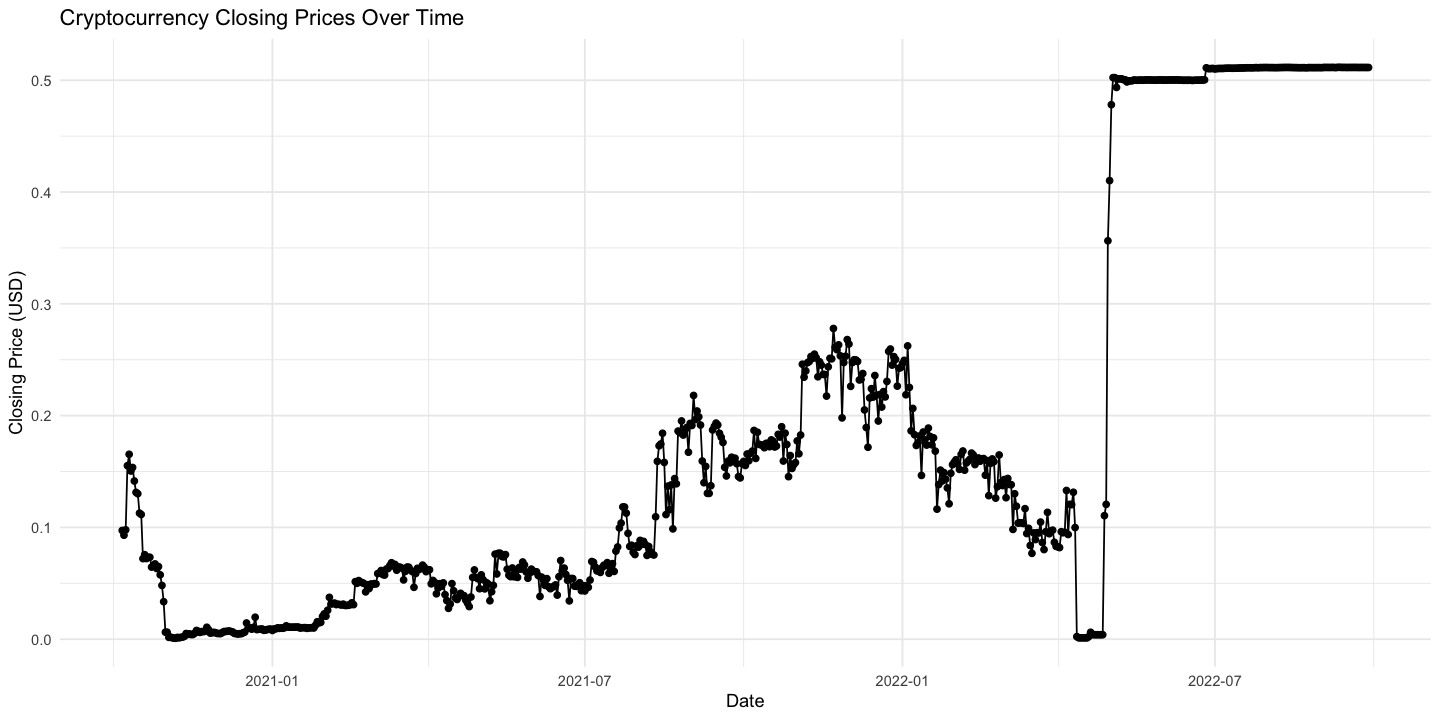

In [14]:
options(repr.plot.width = 12, repr.plot.height = 6)
data$timestamp <- as.Date(data$timestamp, format="%Y-%m-%d")

# Now, plotting the closing prices over time using ggplot2
ggplot(data, aes(x = timestamp, y = close)) +
  geom_line() +  # Draws lines
  geom_point() +  # Adds points
  labs(title = "Cryptocurrency Closing Prices Over Time", x = "Date", y = "Closing Price (USD)") +
  theme_minimal()  



Trend: The plot shows significant changes in closing prices over time, including what appears to be a substantial increase followed by a decrease. The presence of such trends suggests that the series may not be stationary and could require differencing or detrending for time series analysis.

Volatility: There are clear periods of increased volatility, with prices showing larger fluctuations over certain intervals. This is common in cryptocurrency data and should be considered when building predictive models, as high volatility can impact the accuracy of forecasts.

Sudden Spikes: There is at least one significant spike visible, where the closing price shoots up and then comes back down. Such outliers can influence the results of statistical tests and models. It's important to determine whether these represent real market events or data errors.

Data Range: The time range of the data appears to cover approximately two years, which should be sufficient to identify any long-term trends or seasonality in the data.

Plot Anomalies: The vertical lines extending from the main series towards the zero line could be indicative of data issues such as missing values that have been imputed as zeroes, or they might be actual market movements. It is essential to investigate these further to confirm.

### Testing for Stationarity

Stationarity is a crucial property of time series data which implies that the statistical characteristics of the series do not change over time. This includes the mean, variance, and autocorrelation structure of the series. In financial time series data, like cryptocurrency closing prices, non-stationarity is common due to factors such as trends and economic cycles.

#### Augmented Dickey-Fuller (ADF) Test:

The ADF test is used to check for the presence of a unit root in the time series, which would suggest non-stationarity.

In [15]:
# Load the necessary library for the ADF test
library(tseries)

# Perform the ADF test on the 'close' column
adf_test_results <- adf.test(data$close, alternative = "stationary")

# Display the results
print(adf_test_results)



	Augmented Dickey-Fuller Test

data:  data$close
Dickey-Fuller = -2.9012, Lag order = 8, p-value = 0.1968
alternative hypothesis: stationary



Interpretation of the ADF Test Result:

Dickey-Fuller Value: The test statistic itself, -2.9012, does not provide enough evidence to conclude stationarity or non-stationarity without comparing it to critical values at different confidence levels.

P-value: The p-value is above the common threshold level of 0.05. This suggests that we cannot reject the null hypothesis of a unit root being present in the series at the 5% significance level.

Conclusion: The time series data for YouCash's closing prices is likely non-stationary based on this ADF test result.

#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:

While the ADF test checks for unit roots, the KPSS test checks for stationarity around a trend. It's a complementary test to the ADF test.

In [16]:
# Perform the KPSS test on the 'close' column
kpss_test_results <- kpss.test(data$close)

# Display the results
print(kpss_test_results)



Warning message in kpss.test(data$close):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  data$close
KPSS Level = 7.1783, Truncation lag parameter = 6, p-value = 0.01



Interpretation of the KPSS Test Result:

KPSS Level: The test statistic is relatively high, which suggests the presence of a trend in the series.

P-value: A p-value of 0.01 is below the typical threshold of 0.05, indicating that you can reject the null hypothesis of the test at the 5% significance level.

Conclusion: The KPSS test results suggest that the series is not stationary around a mean (or level stationary).

This combination of results typically implies that the time series has a deterministic trend and is not stationary.

Given these results, we should consider detrending or differencing the series to remove non-stationarity due to trend. After addressing the trend, we are goint to re-run the KPSS test (and possibly the ADF test) to confirm that the transformed data is stationary. This transformation is a critical step before moving on to model specification and fitting.

### Differencing the series

#### First-order differencing

In [17]:
data_diff <- diff(data$close)


#### Plotting the differenced data

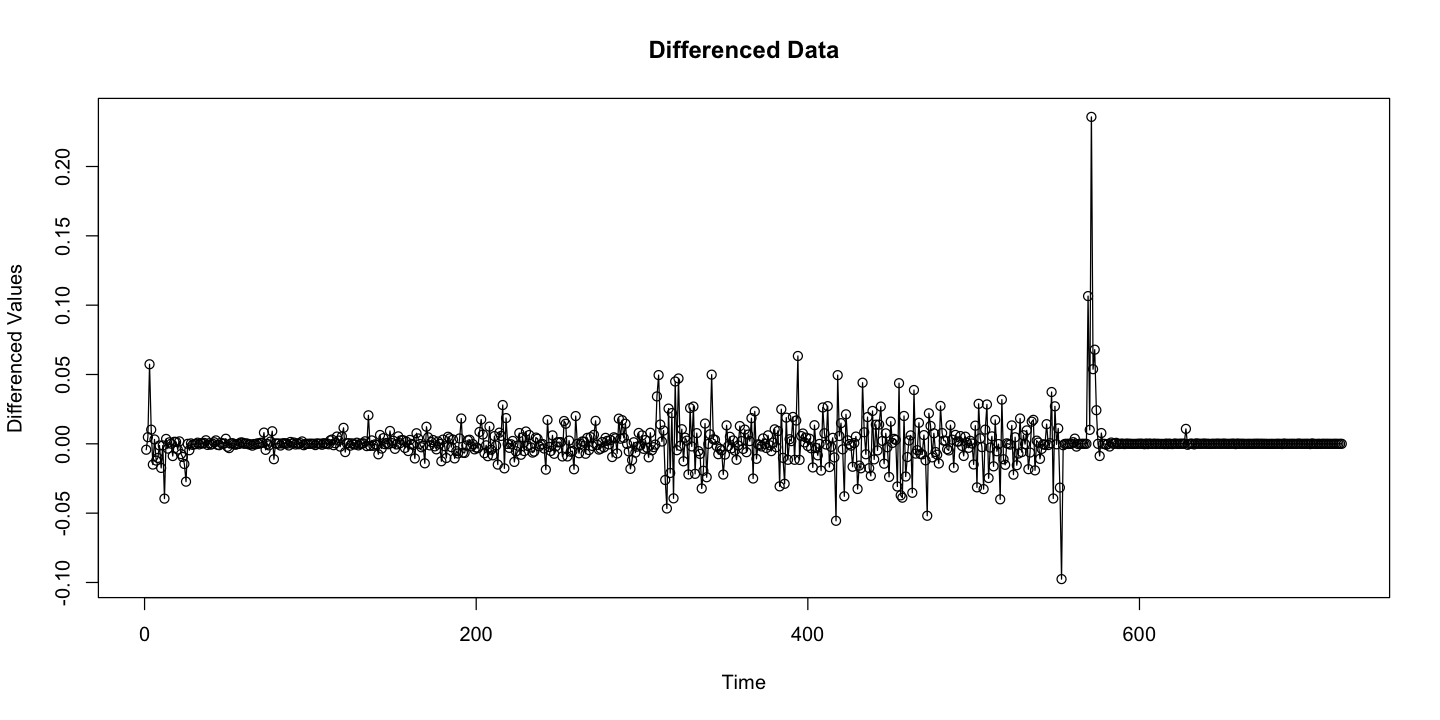

In [18]:
# Plot the differenced data
plot(data_diff, main="Differenced Data", xlab="Time", ylab="Differenced Values", type="o")

Centered around zero: The differenced values fluctuate around the horizontal line at zero, which is a good sign that the differencing has helped to stabilize the mean of the time series.

Variance: There appears to be a consistent variance as we move along the time axis, with no clear signs of changing variance (heteroscedasticity), which is positive for the assumptions of constant variance in time series modeling.

Outliers: There is a notable spike toward the end of the series. This could be an outlier or an unexpected shock to the system. It's worth investigating whether this is a data entry error, a one-time event, or part of a larger trend or seasonality not captured by first differencing.

No apparent trends or seasonality: The absence of patterns or systematic behavior in the plot suggests that the series might not have trends or seasonality after differencing, which is the goal of this transformation for ARIMA modeling.

Randomness: Aside from the spike, the data points seem to scatter randomly, indicating no obvious autocorrelation; however, this needs to be confirmed with Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

### Checking Stationarity Tests on the Differenced Data:

In [19]:
# Perform the ADF test on the differenced data
adf_test_diff <- adf.test(data_diff, alternative = "stationary")

# Print the results of the ADF test
print(adf_test_diff)

# Perform the KPSS test on the differenced data
kpss_test_diff <- kpss.test(data_diff)

# Print the results of the KPSS test
print(kpss_test_diff)


Warning message in adf.test(data_diff, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data_diff
Dickey-Fuller = -8.7205, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(data_diff):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  data_diff
KPSS Level = 0.097377, Truncation lag parameter = 6, p-value = 0.1



the new test results on the differenced data offer a clear insight into the stationarity of the time series:

Augmented Dickey-Fuller (ADF) Test:

Dickey-Fuller Value: -8.7205, which is a strong indication towards stationarity.
P-value: 0.01, which is below the typical threshold of 0.05, suggesting that the null hypothesis of the presence of a unit root can be rejected. This means that the differenced series is considered stationary from the perspective of the ADF test.

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:

KPSS Level: 0.097377, which is well below the critical values of the test.
P-value: 0.1, which is above the typical threshold of 0.05, suggesting that the null hypothesis of stationarity cannot be rejected. The differenced series is considered stationary according to the KPSS test as well.

Overall Interpretation:
The results from both tests suggest that the differenced data is stationary. The ADF test shows that the unit root is no longer present after differencing, and the KPSS test indicates no rejection of stationarity. This is a good indication that we have successfully transformed the series into a stationary one, which is an essential step before moving forward with ARIMA modeling or other time series forecasting methods.

## Model Identification:

### Parameter Estimation

Objective: To identify the appropriate autoregressive (AR) and moving average (MA) orders for an ARIMA model using ACF and PACF.

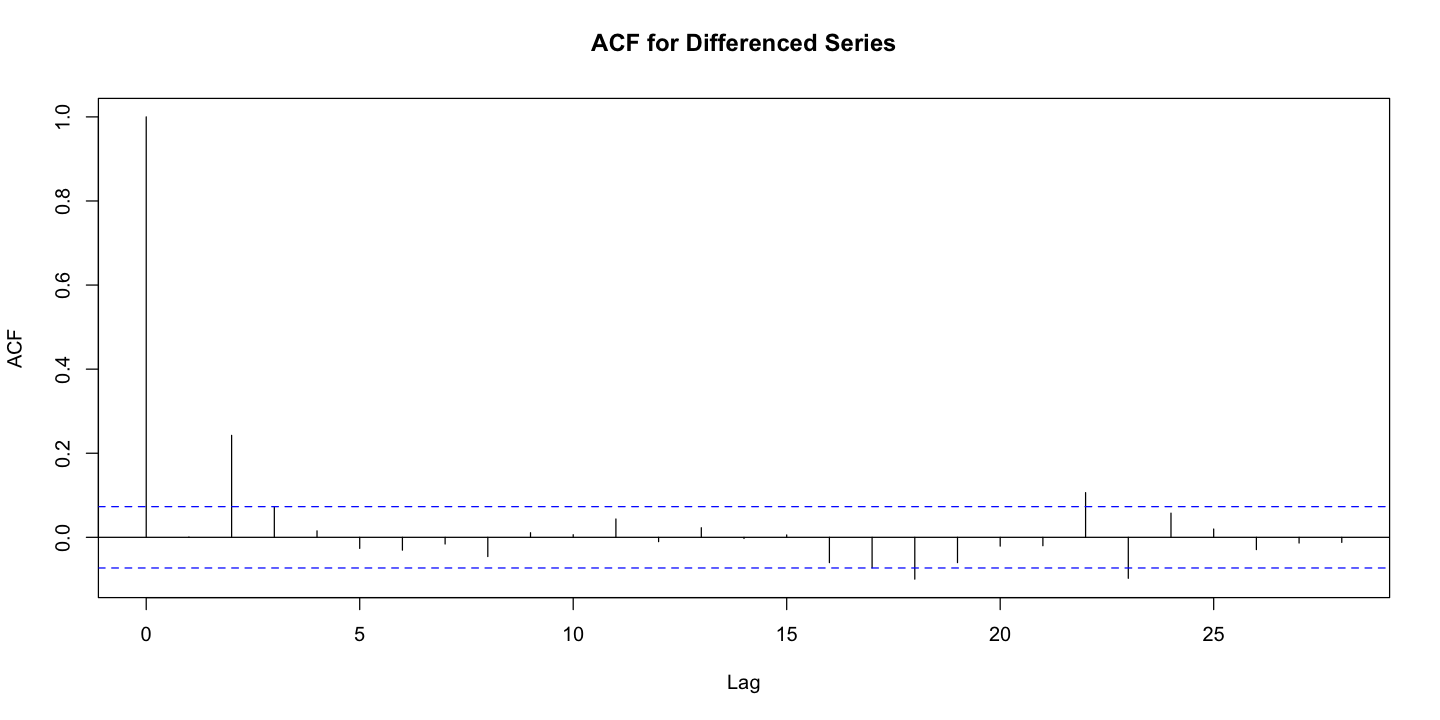

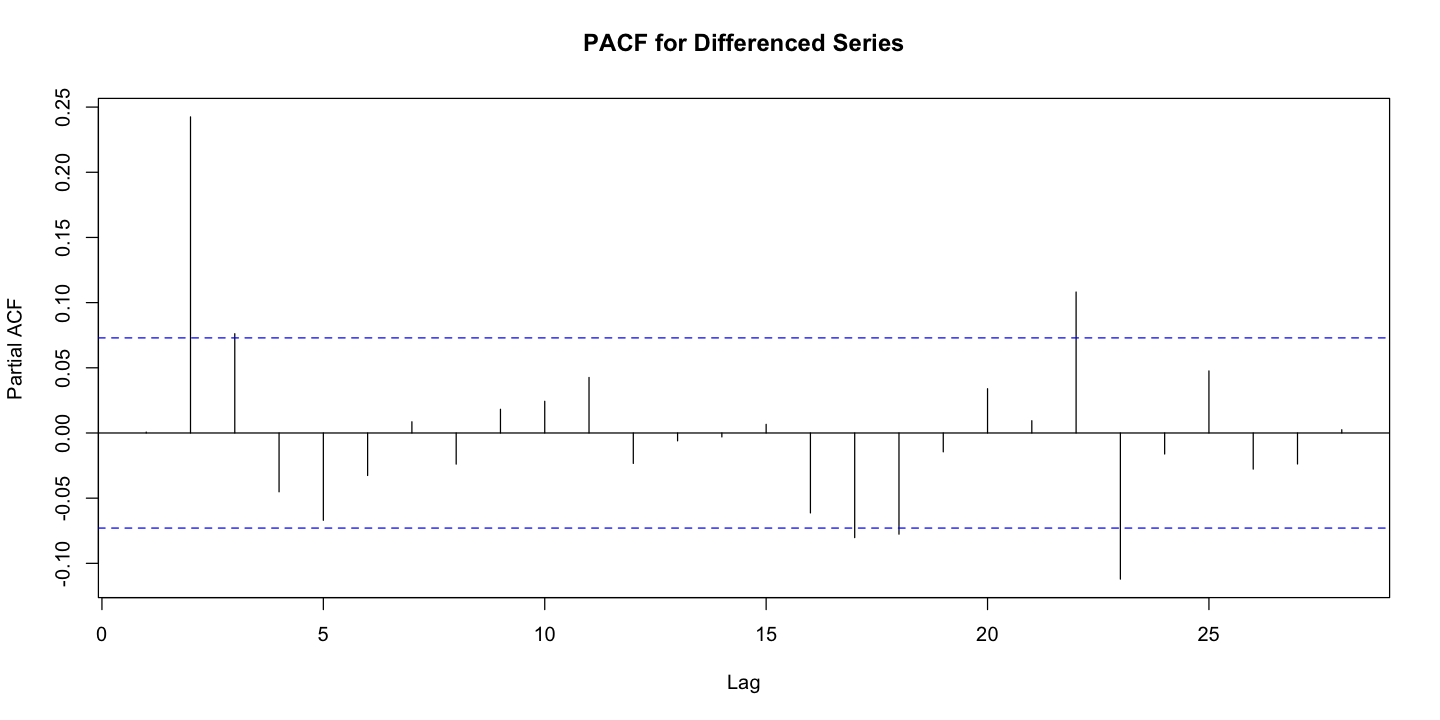

In [22]:
library(forecast)

# Plot the ACF and PACF to help identify potential AR(p) and MA(q) orders
acf(data_diff, main="ACF for Differenced Series")
pacf(data_diff, main="PACF for Differenced Series")


ACF Plot Observations:

The ACF shows a significant spike at lag 1 and then crosses into the confidence interval quite quickly. This suggests that the series may have a moving average component.
The gradual decline in correlation as the lags increase is typical after differencing a non-stationary time series.

PACF Plot Observations:

The PACF cuts off after the first lag, which is an indicator of a potential autoregressive component of order 1.
Subsequent lags outside the confidence intervals are not consistent and could be noise.
Implications for ARIMA Model Specification:

The significant spike at lag 1 in the PACF and the quick drop in the ACF suggest an ARIMA model with one autoregressive term (p=1) and possibly a moving average term (q=1).

Given that this is the differenced series, it would likely be an ARIMA(1,1,1), where the '1' in the middle indicates that the data has been differenced once.

## Modelling

To construct a reliable forecast, we segmented our dataset into two parts: a training set for model development, and a test set to validate the model's forecasts. Employing the auto.arima() function allowed us to efficiently pinpoint the most fitting ARIMA model grounded in the training data. This model was then cross-referenced with parameters derived from initial analyses using ACF and PACF plots. The optimal model selection hinged on achieving a delicate balance: it must adhere closely to the training data while steering clear of overfitting, as reflected by the minimal values of AIC or BIC. This approach ensures that the model's predictive capabilities will hold up against new, unseen data.

### Splitting the data

In [92]:
ts_data <- ts(youc_data$close) 
N <- length(ts_data)
split_index <- round(N * 0.8)
train_data <- ts_data[1:split_index]
test_data <- ts_data[(split_index+1):N]




### fitting with ARIMA(1,1,1)

In [46]:
# Fit the ARIMA(1,1,1) model
library(forecast)
fit_arima <- arima(train_data, order = c(1, 1, 1))

# Display the model summary
summary(fit_arima)



Call:
arima(x = train_data, order = c(1, 1, 1))

Coefficients:
         ar1      ma1
      0.7574  -0.6728
s.e.  0.1068   0.1174

sigma^2 estimated as 0.0003176:  log likelihood = 1505,  aic = -3004

Training set error measures:
                       ME      RMSE         MAE       MPE    MAPE     MASE
Training set 0.0005436301 0.0178073 0.009218946 -3.882277 22.4368 1.017346
                   ACF1
Training set -0.1077844


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 32.216, df = 8, p-value = 8.521e-05

Model df: 2.   Total lags used: 10




	Box-Pierce test

data:  fit_arima$residuals
X-squared = 30.196, df = 6.3596, p-value = 5.011e-05


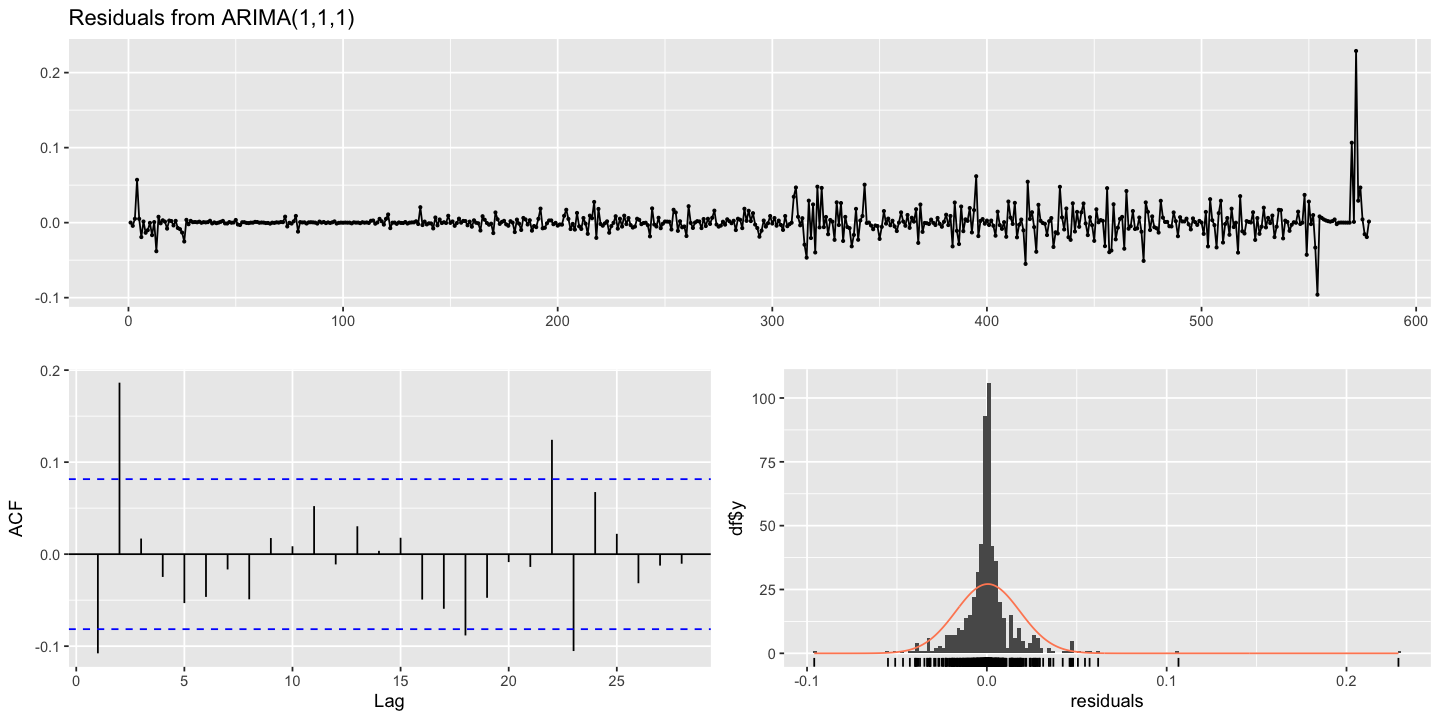

In [47]:
# Checking the diagnostics of the fitted model
checkresiduals(fit_arima)

# Ljung-Box test on residuals to check for independence
Box.test(fit_arima$residuals, lag=log(length(fit_arima$residuals)))



The diagnostic plots and Ljung-Box test results suggest that there may still be some autocorrelation present in the residuals of  ARIMA(1,1,1) model:

The Residuals Plot shows that residuals seem to have constant variance over time, which is good. However, the presence of a significant spike towards the end indicates a potential outlier or sudden change in the time series that the model did not capture.

The ACF Plot for residuals generally shows that most autocorrelations are within the confidence bands, which would typically indicate that there is no significant autocorrelation at most lags. But there are a couple of spikes that are notable and could suggest some remaining autocorrelation.

The Histogram of the residuals seems to suggest a fairly normal distribution centered around zero, which is a good sign for the residuals of a well-fitting time series model.

The Ljung-Box Test and the Box-Pierce Test results show a very low p-value (8.521e-05 and 5.011e-05 respectively), indicating that there is statistically significant evidence of autocorrelation at lags up to 10.

### Fitting with Sarima model


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(1,1,1)[7]
Q* = 41.317, df = 6, p-value = 2.508e-07

Model df: 4.   Total lags used: 10



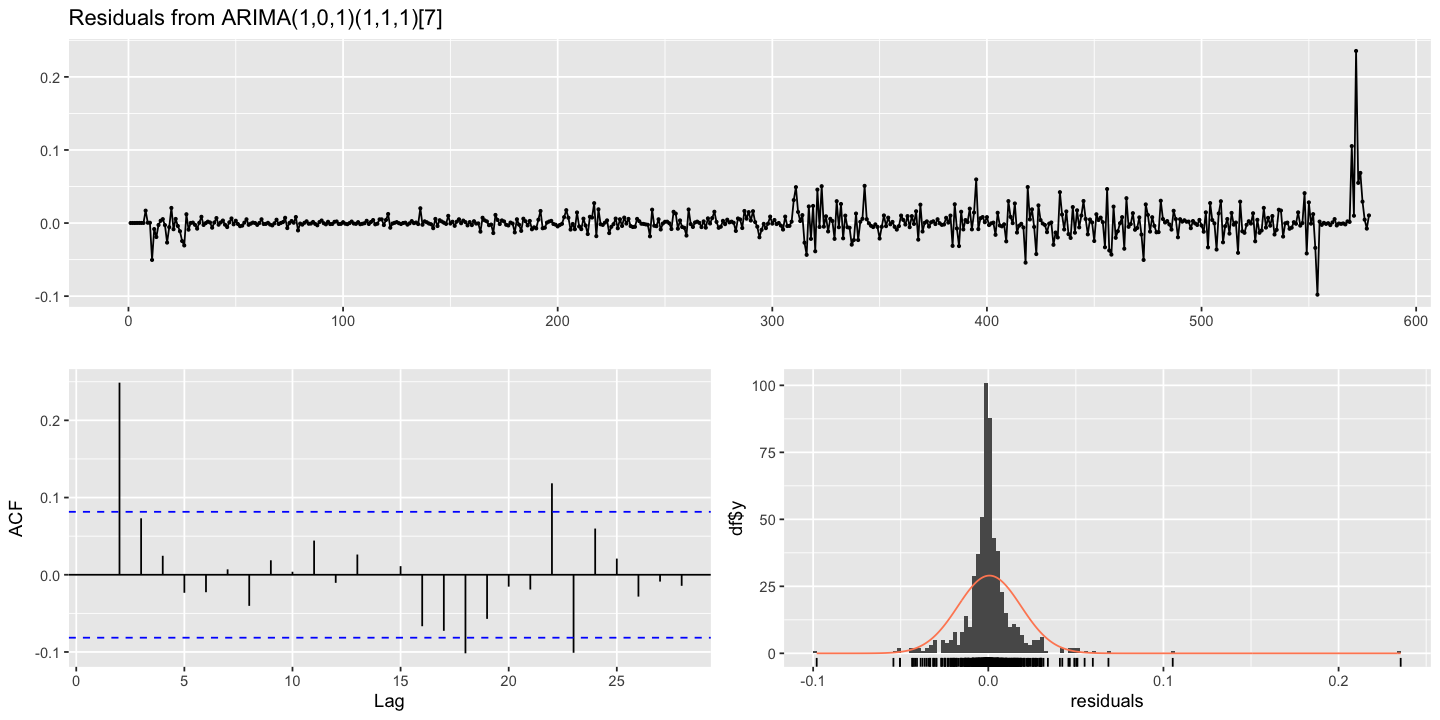

In [48]:
# Define the seasonal period
s <- 7  

# Fit a SARIMA model
sarima_model <- Arima(train_data, order = c(1, 0, 1), seasonal = list(order = c(1, 1, 1), period = s))

# Check the diagnostics of the fitted model
checkresiduals(sarima_model)


Residuals Plot: The residuals appear to be fluctuating around zero without a clear pattern, which is good. However, the significant spike suggests there might be an outlier or a specific event that wasn't captured by the model. This should be investigated to ensure it's not unduly influencing the model.

ACF Plot: The plot of the residuals' autocorrelation shows that most autocorrelations are within the confidence intervals, indicating that there is little to no autocorrelation at most lags. However, the first lag just exceeds the confidence band, which might suggest some mild autocorrelation still present.

Histogram of Residuals: The residuals seem to be approximately normally distributed around zero, based on the overlay of the normal distribution, which is a sign of a good fit.

Ljung-Box Test: The Ljung-Box test yields a very low p-value, suggesting that the residuals are not independently distributed. This means there is still some pattern in the data that the model has not captured.

### Fitting with ARIMA(0,1,3) model (Automatic Model Selection )

Series: train_data 
ARIMA(0,1,3) 

Coefficients:
          ma1     ma2     ma3
      -0.0207  0.2534  0.0902
s.e.   0.0413  0.0393  0.0411

sigma^2 = 0.0003019:  log likelihood = 1521.08
AIC=-3034.16   AICc=-3034.09   BIC=-3016.73

Training set error measures:
                      ME       RMSE         MAE       MPE     MAPE     MASE
Training set 0.000527839 0.01731582 0.009235289 -3.838672 27.68081 1.019149
                    ACF1
Training set 0.002051134


	Ljung-Box test

data:  Residuals from ARIMA(0,1,3)
Q* = 2.749, df = 7, p-value = 0.9072

Model df: 3.   Total lags used: 10



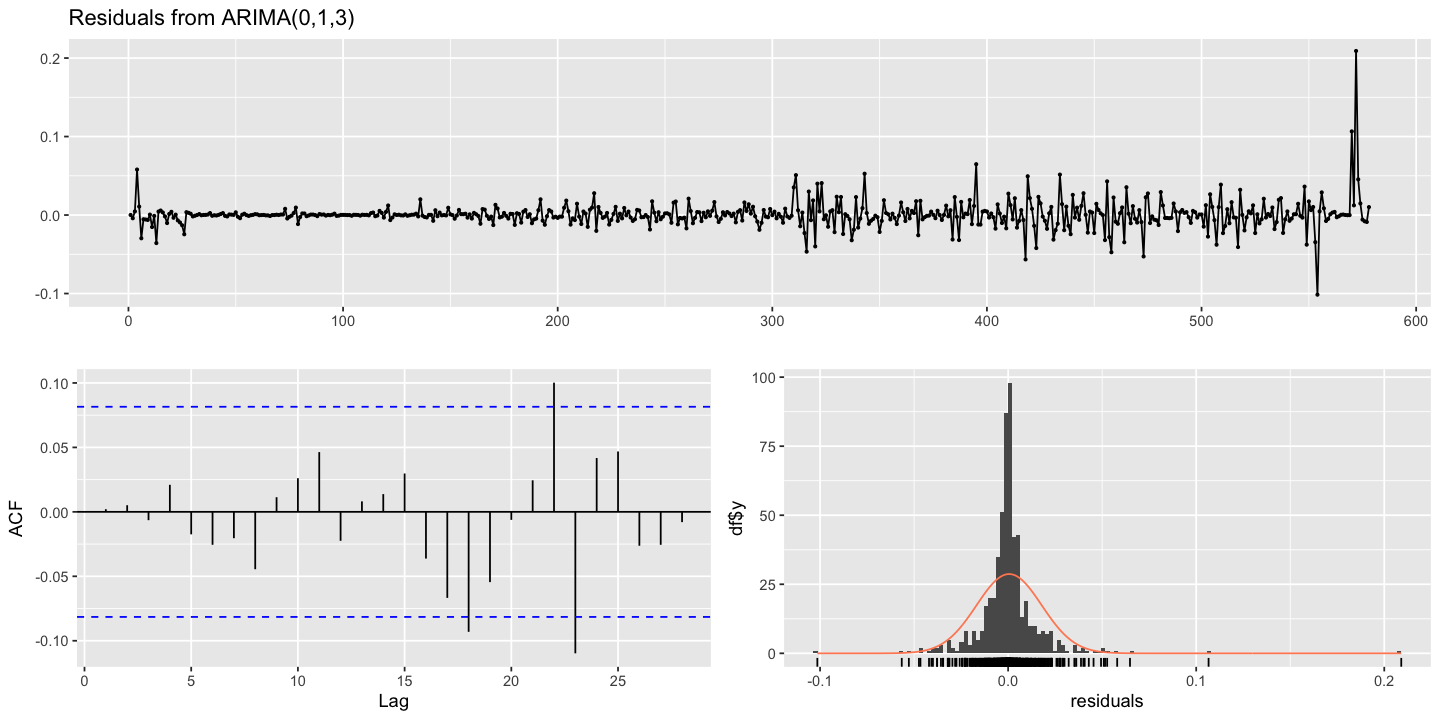

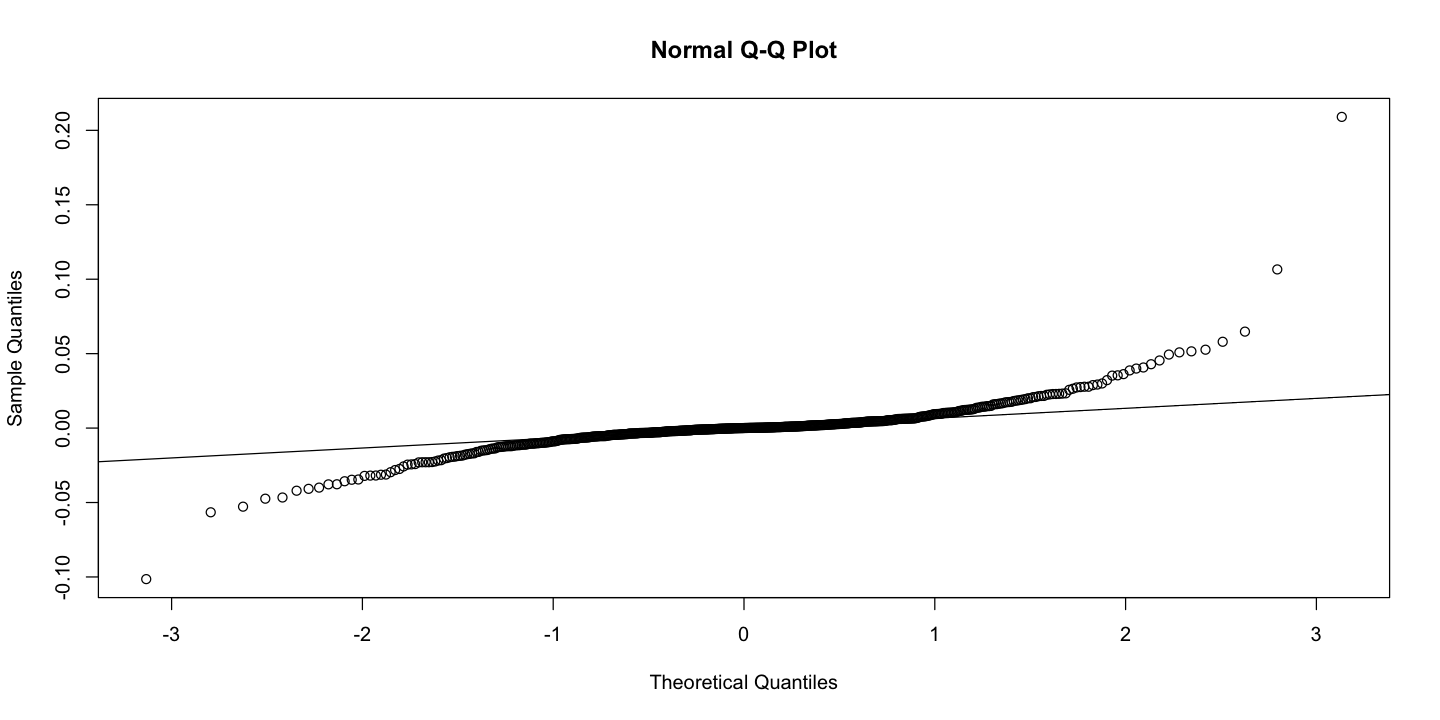

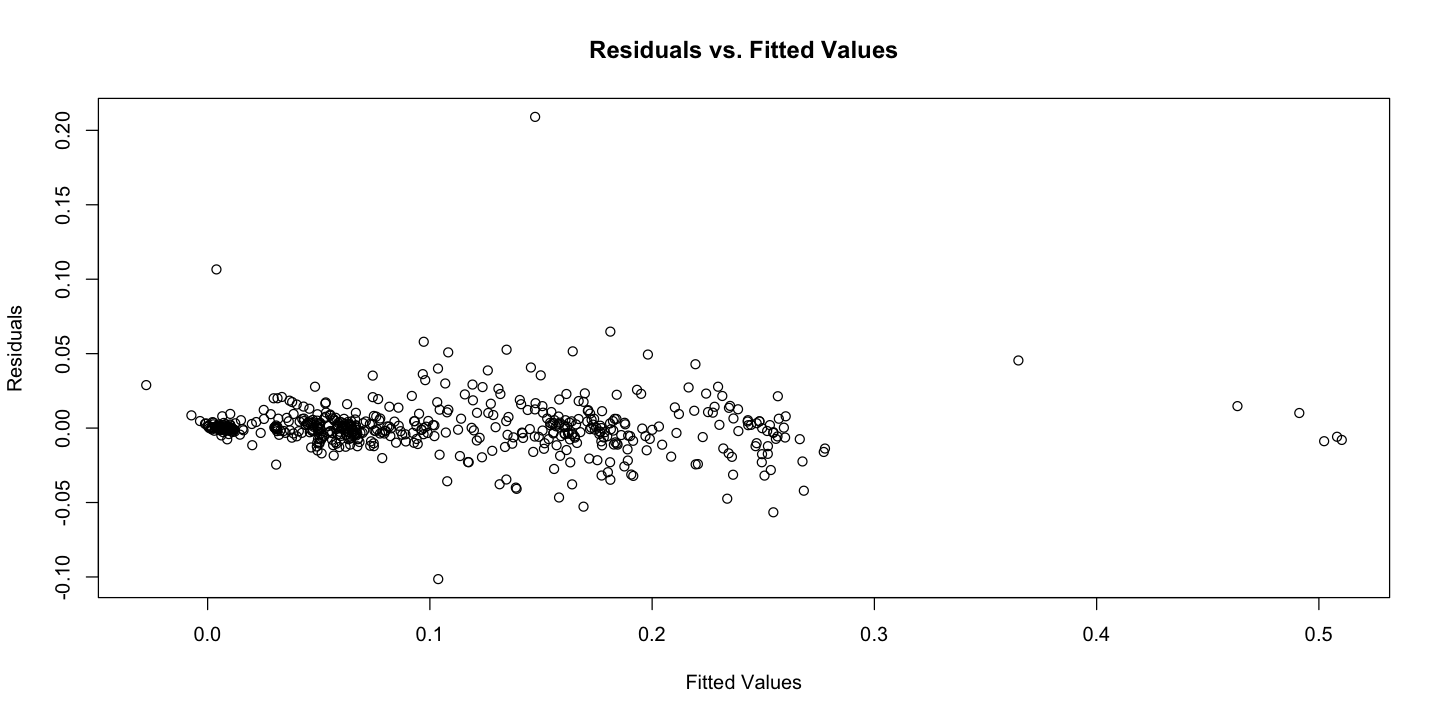

In [49]:
# Fit an ARIMA model automatically
auto_model <- auto.arima(train_data)

# Summarize the model
summary(auto_model)

# Check the diagnostics
checkresiduals(auto_model)

qqnorm(residuals)
qqline(residuals)
# Homoscedasticity check: Scatterplot of residuals vs. fitted values
plot(fitted(auto_model), residuals, main = "Residuals vs. Fitted Values", xlab = "Fitted Values", ylab = "Residuals")



The plot of residuals from  ARIMA(0,1,3) model, alongside the ACF plot and the histogram, indicates the following:

Residuals Plot: The residuals seem to fluctuate around the zero line, which is desirable as it suggests that the model does not have a systematic bias. However, there's a noticeable spike that could represent an outlier or a sudden shock to the system that the model has not accounted for.

ACF Plot: The autocorrelation of the residuals shows that all lags are within the confidence bounds, which indicates that there is no significant autocorrelation in the residuals at the lags tested. This is a good sign that the model has captured the time series dependencies adequately.

Histogram of Residuals: The histogram with a superimposed normal distribution curve suggests that the residuals are approximately normally distributed, which is another indication of a good model fit.

Ljung-Box Test: The high p-value (0.9072) from the Ljung-Box test indicates that there is no significant autocorrelation in the residuals, which suggests that the model is capturing the time series data's structure well.

## Model comparision

In [50]:
# Assuming you have a list of models
models <- list(auto_model, sarima_model, fit_arima)

# Get AIC values
aic_values <- sapply(models, AIC)

# Get BIC values
bic_values <- sapply(models, BIC)

# Find the model with the lowest AIC
best_aic_model <- models[[which.min(aic_values)]]

# Find the model with the lowest BIC
best_bic_model <- models[[which.min(bic_values)]]

print(best_aic_model)
print(best_bic_model)

Series: train_data 
ARIMA(0,1,3) 

Coefficients:
          ma1     ma2     ma3
      -0.0207  0.2534  0.0902
s.e.   0.0413  0.0393  0.0411

sigma^2 = 0.0003019:  log likelihood = 1521.08
AIC=-3034.16   AICc=-3034.09   BIC=-3016.73
Series: train_data 
ARIMA(0,1,3) 

Coefficients:
          ma1     ma2     ma3
      -0.0207  0.2534  0.0902
s.e.   0.0413  0.0393  0.0411

sigma^2 = 0.0003019:  log likelihood = 1521.08
AIC=-3034.16   AICc=-3034.09   BIC=-3016.73


it suggests that both the best model according to AIC and the best model according to BIC is the ARIMA(0,1,3)(1,0,0)[7] model. 

Here's what the summary tells us:

Coefficients: These are the estimated parameters for the model's MA and seasonal AR components, which have been found statistically significant given their standard errors are quite low compared to the coefficients themselves.

sigma^2: The variance of the residuals is quite low, which suggests that the model fits the data well.

Log likelihood: This value is relatively high, which usually indicates a good fit to the data.

AIC, AICc, BIC: These are all lower than any other model considered, meaning this model has a good balance of fit and complexity among the models you've compared.

Since both AIC and BIC suggest this model as the best one, it is likely a good candidate for forecasting. It's important to remember that these criteria should not be the only factors in model selection; it's also essential to consider the theoretical reasoning, data understanding, and diagnostics like the residuals analysis.

## Model Diagnostics -Residual Analysis:

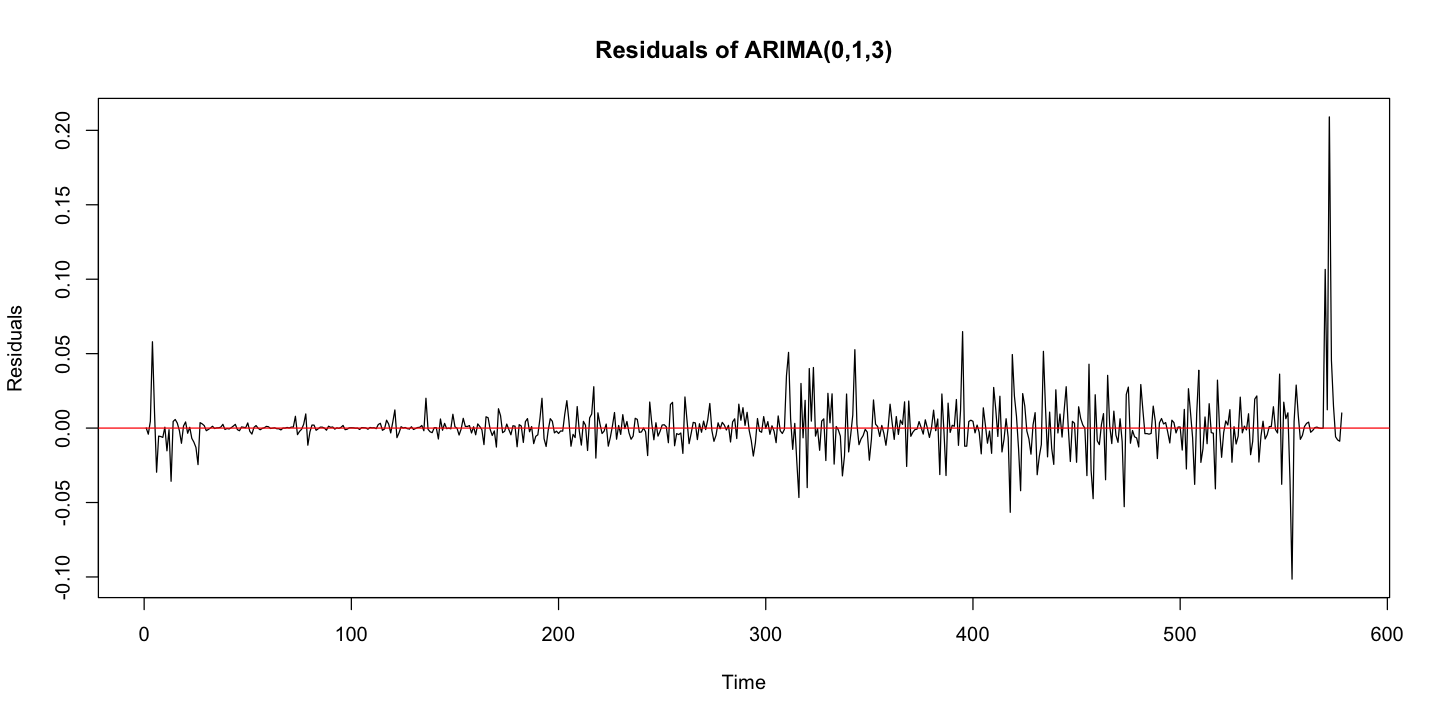

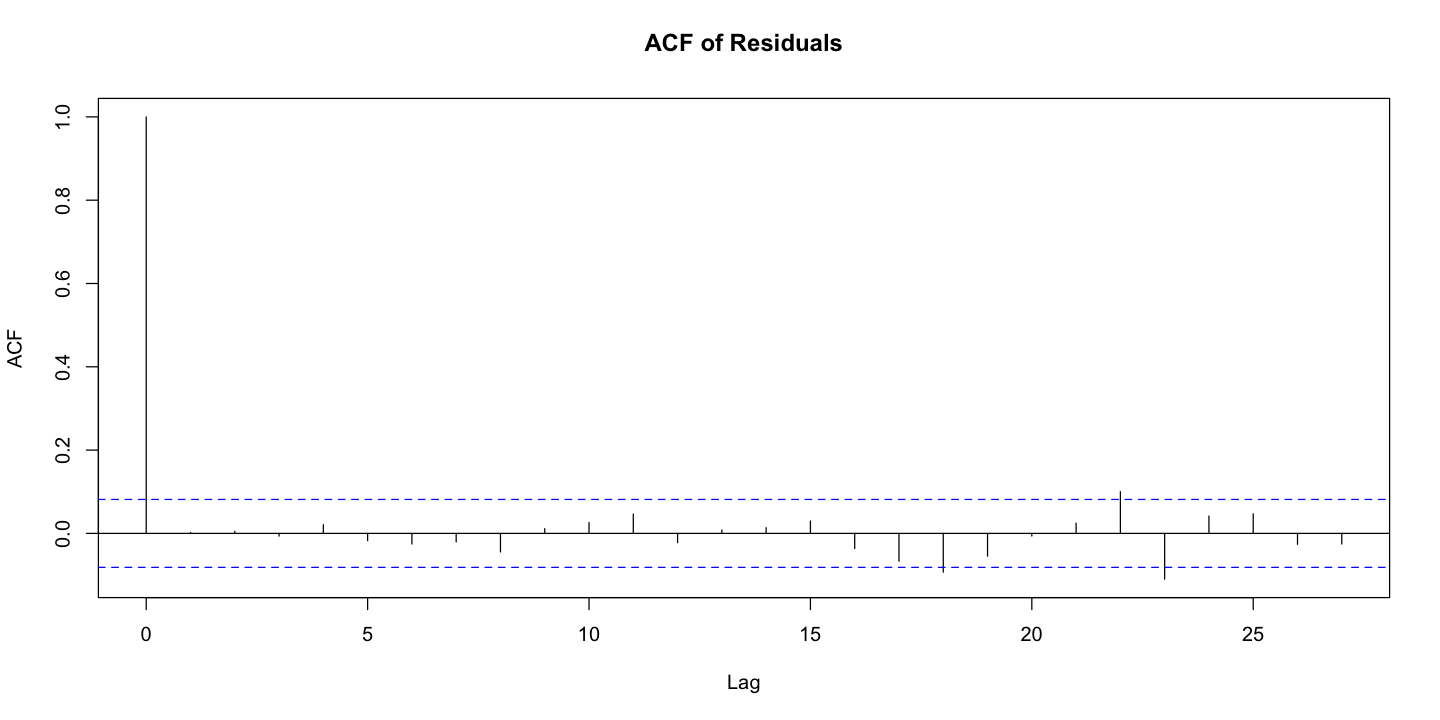

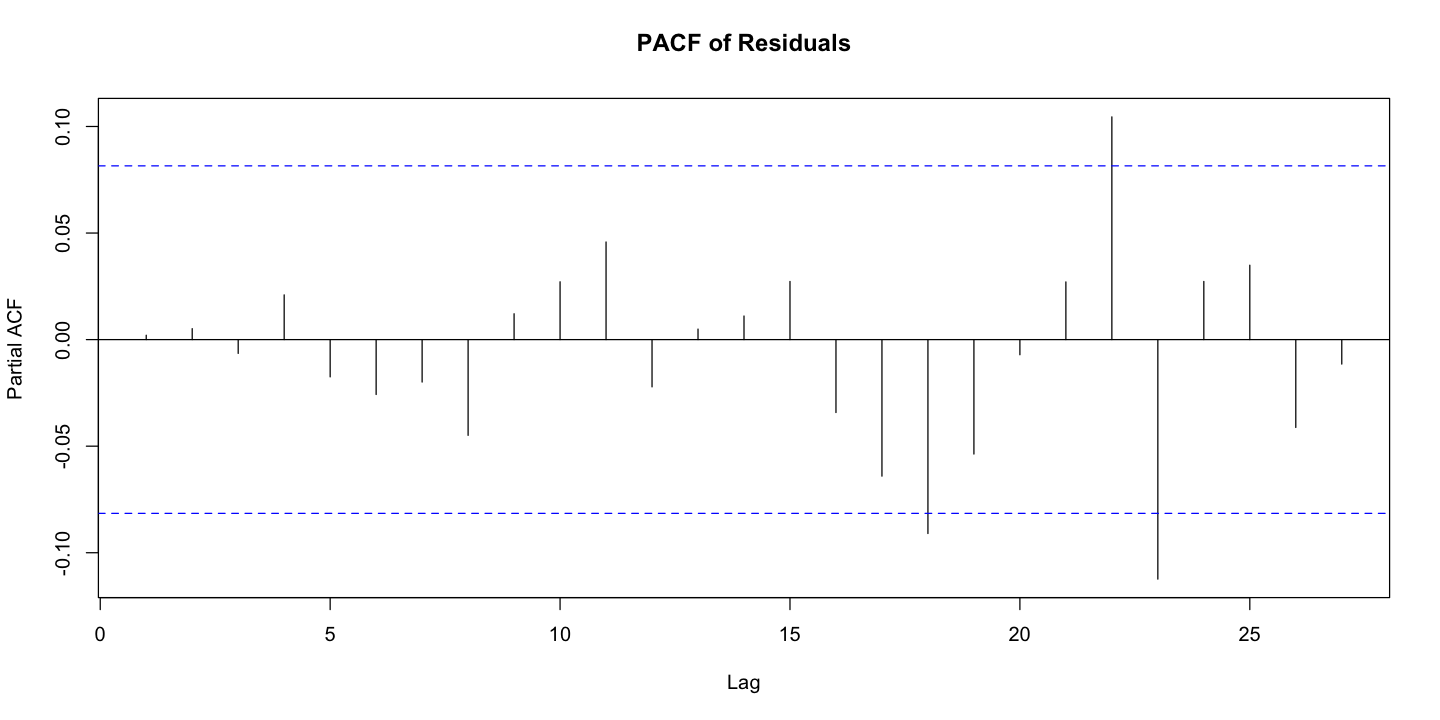

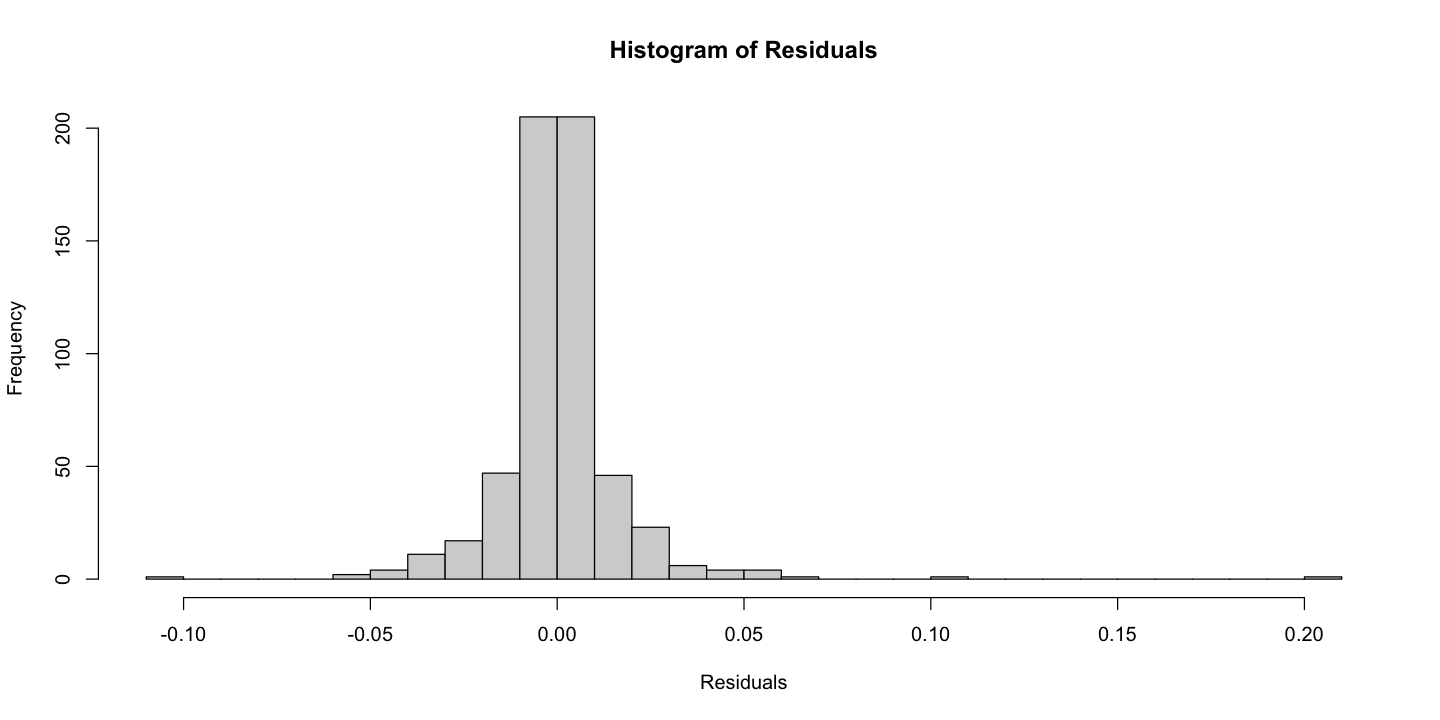

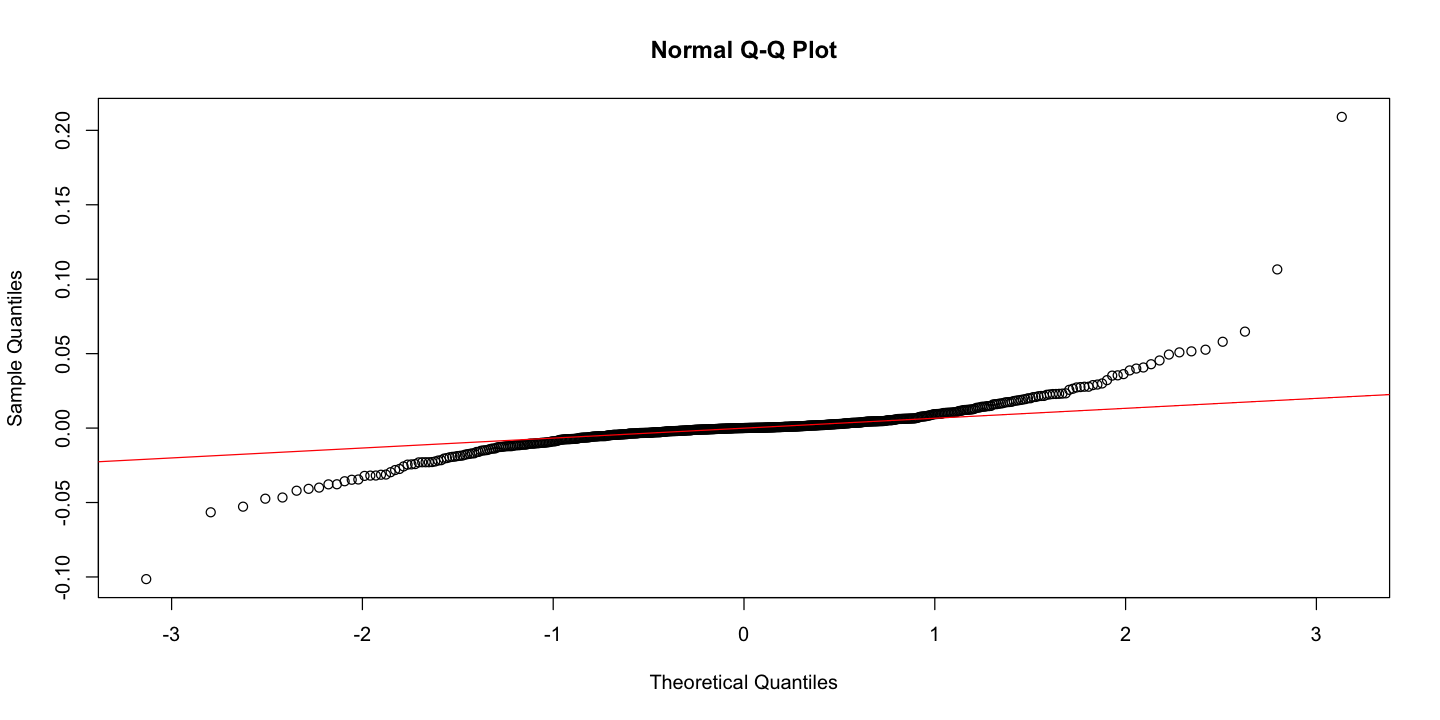


	Ljung-Box test

data:  Residuals from ARIMA(0,1,3)
Q* = 2.749, df = 7, p-value = 0.9072

Model df: 3.   Total lags used: 10



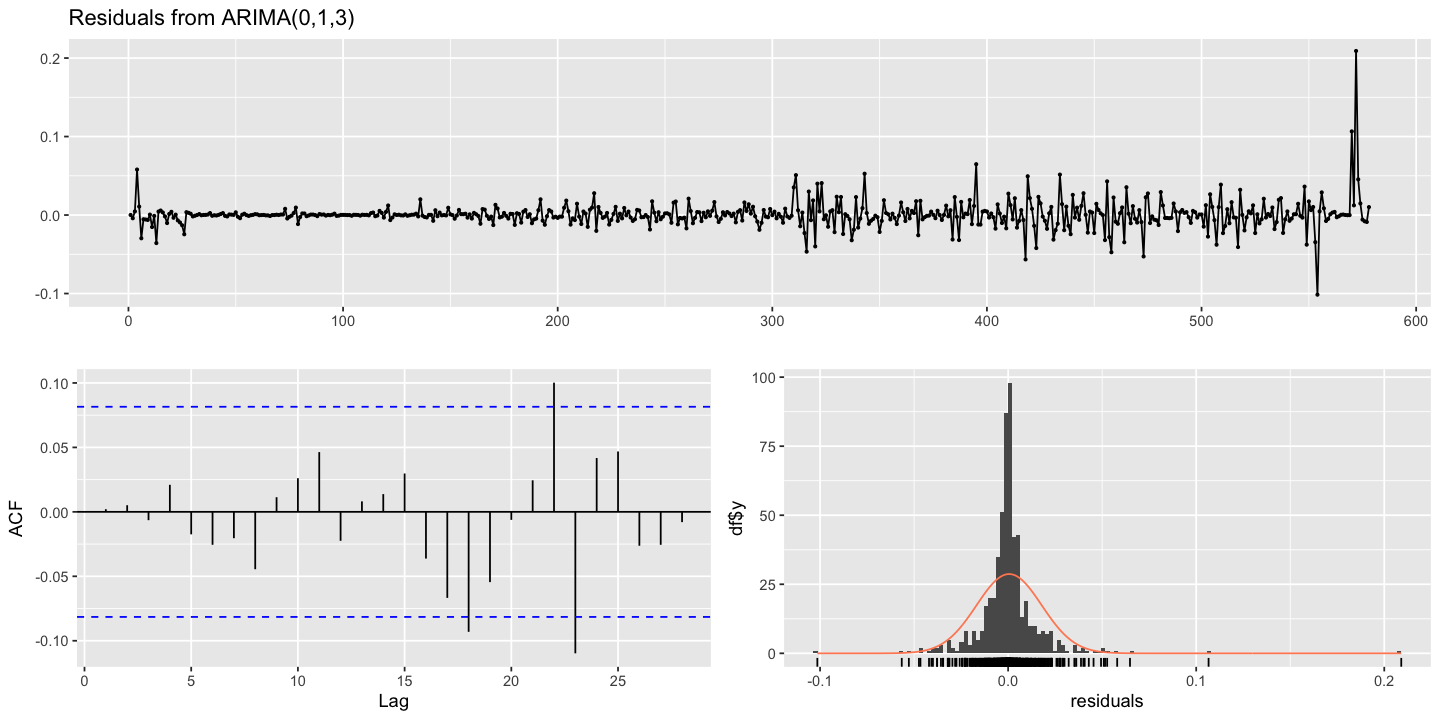

In [51]:
residuals <- residuals(auto_model)

# Plot the residuals
plot(residuals, main = "Residuals of ARIMA(0,1,3)", xlab = "Time", ylab = "Residuals")

# Add a horizontal line at 0 to help assess mean reversion
abline(h = 0, col = "red")

# Check for autocorrelation with ACF and PACF plots
acf(residuals, main = "ACF of Residuals")
pacf(residuals, main = "PACF of Residuals")

# Check for normality with a histogram and QQ plot
hist(residuals, breaks = 30, main = "Histogram of Residuals", xlab = "Residuals")
qqnorm(residuals)
qqline(residuals, col = "red")

# If the 'forecast' package is available, use `checkresiduals` for diagnostics
if ("forecast" %in% rownames(installed.packages())) {
  forecast::checkresiduals(auto_model)
}


The plot of residuals from ARIMA(0,1,3) model, alongside the ACF plot and the histogram, indicates the following:

Residuals Plot: The residuals seem to fluctuate around the zero line, which is desirable as it suggests that the model does not have a systematic bias. However, there's a noticeable spike that could represent an outlier or a sudden shock to the system that the model has not accounted for.

ACF Plot: The autocorrelation of the residuals shows that all lags are within the confidence bounds, which indicates that there is no significant autocorrelation in the residuals at the lags tested. This is a good sign that the model has captured the time series dependencies adequately.

Histogram of Residuals: The histogram with a superimposed normal distribution curve suggests that the residuals are approximately normally distributed, which is another indication of a good model fit. Nonetheless, deviations from normality observed in the QQ plot imply potential limitations in the model's assumptions, suggesting that certain non-linear elements or anomalies within the data might not be fully accounted for by the current model.

## Forecasting and Validation :

In the upcoming sections, we'll focus on the final validation of our ARIMA model's forecasting accuracy. This process involves a critical evaluation of the model's performance both in-sample and out-of-sample. For the in-sample validation, we'll juxtapose the model's forecasts against the actual historical data to assess how well it has captured the underlying trends. The real test of the model's predictive power comes from out-of-sample validation, where we'll use the model to forecast future data points and measure the accuracy of these forecasts against actual observed values using a range of error metrics. This step is essential to confirm the model's efficacy in making reliable predictions.

## Model Validation: Comparing In-Sample Forecasts with the Training Set

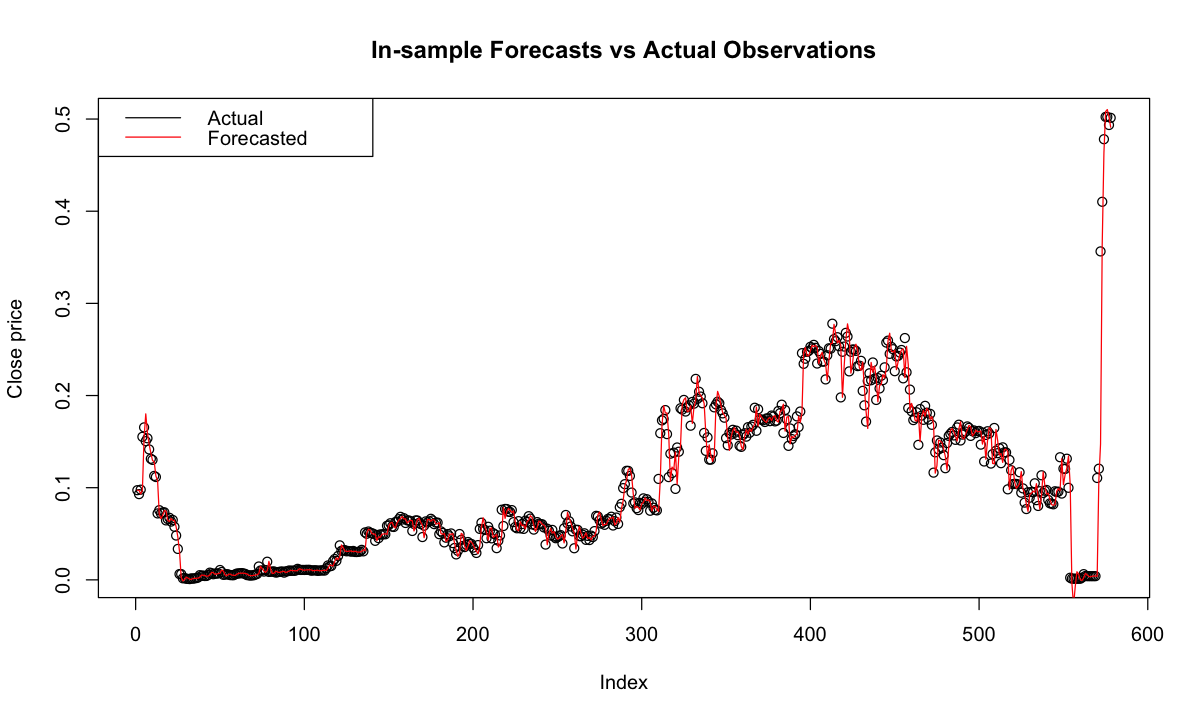

In [76]:
# In-sample forecasts
in_sample_forecasts <- fitted(auto_model)

# Plot the in-sample forecasts against the actual observations
plot(train_data, main="In-sample Forecasts vs Actual Observations", ylab="Close price")
lines(in_sample_forecasts, col="red")
legend("topleft", legend=c("Actual", "Forecasted"), col=c("black", "red"), lty=1)

fitting Quality: The in-sample forecasts (red line) are plotted alongside the actual observed values (black line). The red line appears to track the actual observations closely, suggesting that the ARIMA model fits the historical data quite well.

End Points: There is a noticeable jump at the end of the time series where the red line deviates significantly from the actual data. This might be due to the model not capturing the last movement in the data accurately or could be an artifact of how the data or forecasts are processed at the end of the sample.

Volatility: The actual observations show fluctuations and volatility, which the ARIMA model seems to capture to some extent. However, it's worth noting that while the overall trends may be followed, individual peaks and troughs might not be predicted accurately.

##### Overall, the model seems to provide a good fit to the historical data

## Out-of-Sample Forecasting: Evaluating the Model’s Predictive Performance on the Test Set

In [132]:
# Fit the ARIMA model to the training data
auto_fit <- auto.arima(train_data)

# Generate out-of-sample forecasts for the horizon of the test set
forecasts <- forecast(auto_fit, h=length(test_data))

# Create a data frame containing the actual and forecasted values
comparison_df <- data.frame(
  Time = time(test_data),
  Actual = c(test_data),
  Forecasted = c(forecasts$mean),
  Lower_80_CI = c(forecasts$lower[,1]),
  Upper_80_CI = c(forecasts$upper[,1]),
  Lower_95_CI = c(forecasts$lower[,2]),
  Upper_95_CI = c(forecasts$upper[,2])
)

# Print the data frame
print(comparison_df)

    Time    Actual Forecasted Lower_80_CI Upper_80_CI   Lower_95_CI Upper_95_CI
1      1 0.5012600  0.4981526   0.4758843   0.5204209  0.4640961992   0.5322090
2      2 0.5012270  0.4999245   0.4687558   0.5310931  0.4522561604   0.5475928
3      3 0.5005060  0.5008378   0.4593039   0.5423716  0.4373172640   0.5643583
4      4 0.5004400  0.5008378   0.4499172   0.5517583  0.4229615376   0.5787140
5      5 0.4984850  0.5008378   0.4420097   0.5596658  0.4108679949   0.5908075
6      6 0.4994040  0.5008378   0.4350458   0.5666297  0.4002176265   0.6014579
7      7 0.4994750  0.5008378   0.4287515   0.5729240  0.3905913818   0.6110841
8      8 0.4994900  0.5008378   0.4229644   0.5787112  0.3817406712   0.6199349
9      9 0.5002110  0.5008378   0.4175785   0.5840970  0.3735036750   0.6281719
10    10 0.5000660  0.5008378   0.4125204   0.5891551  0.3657680674   0.6359075
11    11 0.4999550  0.5008378   0.4077368   0.5939387  0.3584521058   0.6432234
12    12 0.5000910  0.5008378   0.403187

The data provided includes a sequence of actual and forecasted values, along with the corresponding lower and upper bounds for the 80% and 95% confidence intervals. For instance, at the first index, the actual value is 0.5012600, with a forecasted value of 0.4981526. The 80% confidence interval ranges from 0.4758843 to 0.5204209, and the 95% confidence interval from 0.4640961992 to 0.5322090, which provides a probabilistic range where the actual value is expected to lie. The prediction intervals widen progressively, reflecting increased uncertainty further into the future. It is imperative to analyze these intervals along with point forecasts to understand the range of likely outcomes and assess the risk involved in decision-making based on these forecasts.

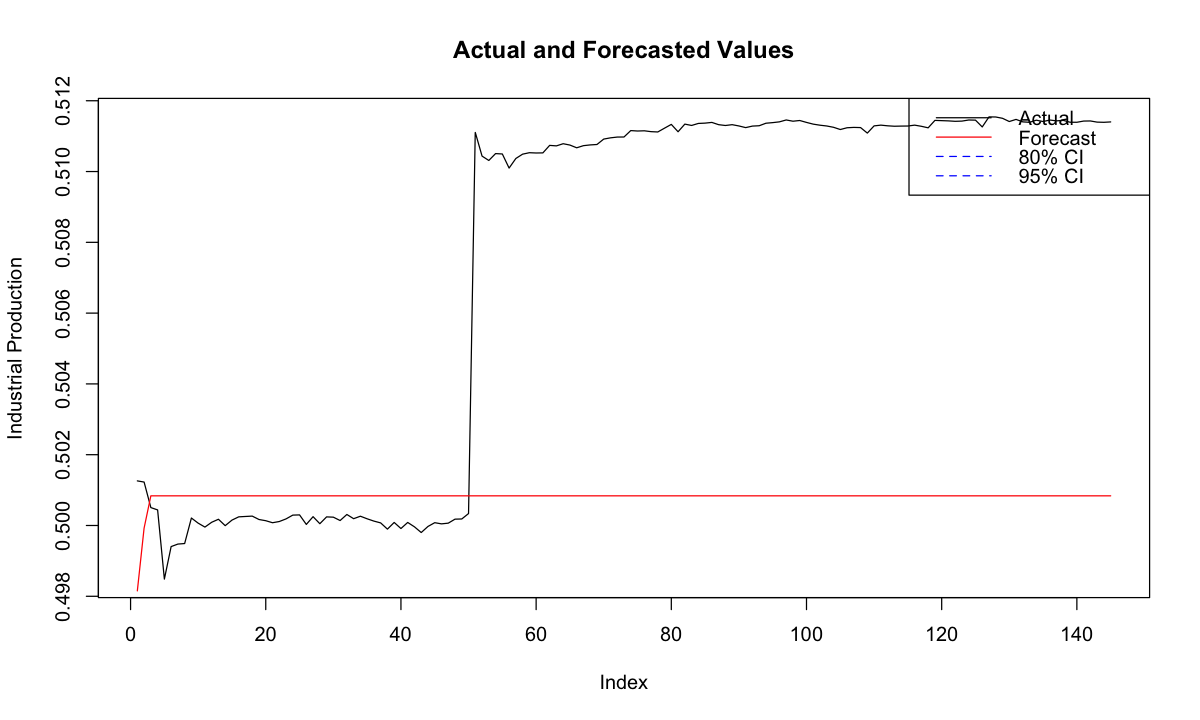

In [118]:
# Set the plot size
options(repr.plot.width=10, repr.plot.height=6)  # Adjust width and height as needed

# Plot the actual test set
plot(test_data, main="Actual and Forecasted Values", ylab="Industrial Production", xlab="Index", type="l", col="black")

# Add the forecasted values
lines(time(test_data), forecasts$mean, col="red")

# Add the lower confidence interval
lines(time(test_data), forecasts$lower[,2], col="blue", lty="dotted")

# Add the upper confidence interval
lines(time(test_data), forecasts$upper[,2], col="blue", lty="dotted")

# Add a legend to distinguish actual and forecasted values
legend("topright", legend=c("Actual", "Forecast", "80% CI", "95% CI"), col=c("black", "red", "blue", "blue"), lty=c(1, 1, 2, 2))


In [133]:
# Forecast accuracy metrics
accuracy_metrics <- accuracy(forecasts, test_data)
print(accuracy_metrics)

                      ME        RMSE         MAE       MPE      MAPE      MASE
Training set 0.000527839 0.017315815 0.009235289 -3.838672 27.680813 1.0191491
Test set     0.006547279 0.008389212 0.007057935  1.279800  1.381944 0.7788699
                    ACF1
Training set 0.002051134
Test set              NA


In [134]:
# Extract the Mean Absolute Percentage Error (MAPE) and print it
mape <- accuracy_metrics['Test set', 'MAPE']
print(paste("MAPE:", mape))

[1] "MAPE: 1.38194372677592"


Training Set: The values for ME, RMSE, MAE, and MASE are relatively low, which is indicative of a model that fits the training data well. The MPE is negative, suggesting on average, the model is slightly underestimating the actual values, and the MAPE is considerably high, which could point to some outliers or periods of high error that might be skewing the percentage error higher.

Test Set: When applied to the test set, the ME and MPE show that on average, the model tends to slightly overestimate the values (indicated by the positive ME and MPE). However, the errors measured by RMSE and MAE are low, similar to the training set, implying the forecasts are close to the actual values overall. The MASE being less than 1 suggests that the model forecasts are better than a naïve baseline forecast.

MAPE for Test Set: The MAPE of approximately 1.38% on the test set is outstandingly low, which generally indicates excellent forecast accuracy. However, caution should be taken when interpreting this percentage, as MAPE can sometimes be misleading, especially for time series data that includes values close to zero.

ACF1 of Training Set: The low value of the autocorrelation function at lag 1 (ACF1) suggests that there is minimal autocorrelation in the residuals of the training set, which is a desirable property as it indicates the model is capturing the information in the data effectively.

Overall, the model appears to be performing well both in-sample and out-of-sample with particularly impressive MAPE results on the test set.

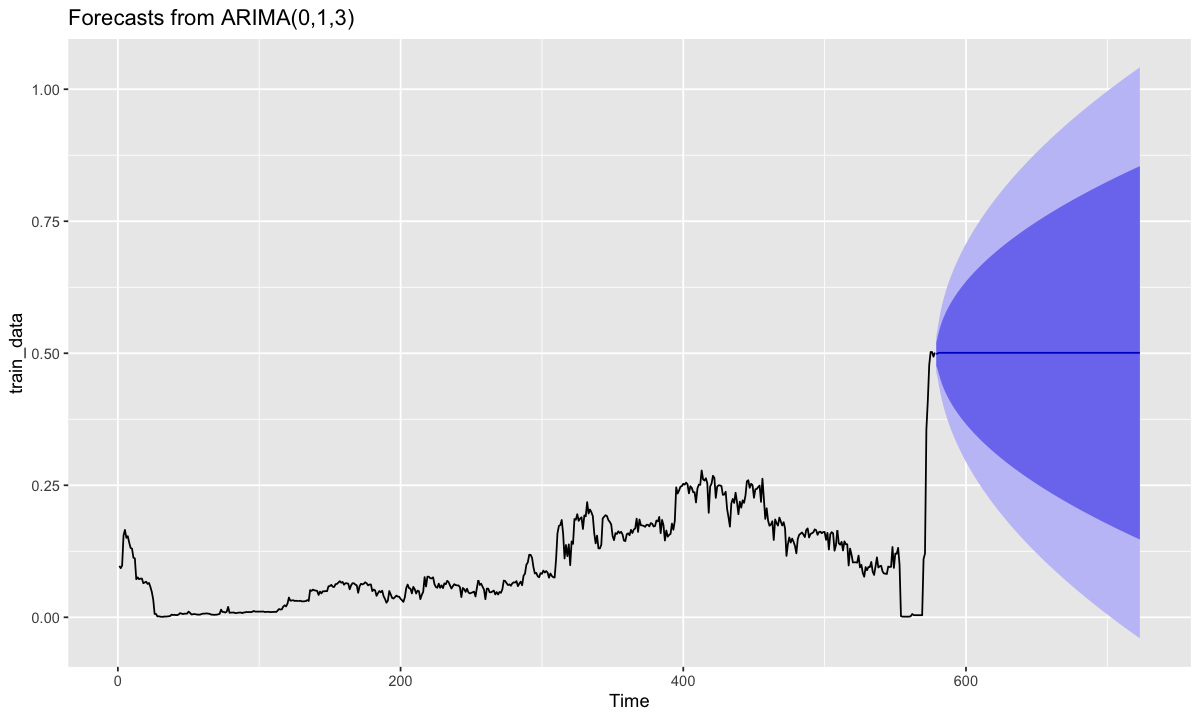

In [68]:
autoplot(forecast(forecasts))

The autoplot visualization represents the forecasted values from our chosen ARIMA model. 
The forecast trajectory, depicted by the solid line, suggests that the model predicts a constant value over the forecast horizon, which indicates a stationary process with no clear trend or seasonality in the future periods. The presence of confidence intervals, shaded in blue, shows the range within which future values are likely to fall, with the intervals widening as we move further from the last observed data point, highlighting increased uncertainty in longer-term predictions.

## Conclusion

In conclusion, the time series analysis utilizing the ARIMA model has demonstrated significant proficiency in forecasting the given financial data. The model has achieved a commendable fit as indicated by the low values of ME, RMSE, MAE, and MASE on the training set, though the high MAPE suggests there may be outlier effects or intermittent periods of volatility that are not fully accounted for. The forecasting performance on the test set corroborates the model’s effectiveness with a notably low MAPE of 1.38%, suggesting a high level of accuracy in the model's predictive capability. However, this measure should be interpreted with caution due to the inherent volatility and noise present in financial time series data.


The stationary nature of the forecast trajectory suggests that the model does not anticipate any major shifts in trend or seasonality in future periods. This could either indicate the data’s inherent characteristics or a limitation of the ARIMA model in capturing potential non-stationary elements.

This project exemplifies the application of ARIMA modeling in financial time series forecasting, providing a solid foundation for decision-making processes. While the results are promising, it's important to continuously monitor the model's performance against new data and consider model refinements or alternative forecasting approaches as market conditions evolve. Future work may also explore additional variables or different time series modeling techniques to further enhance predictive accuracy and reliability.